In [1]:
# For data manipulation
import pandas as pd

# for scientific computation
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler

# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

In [2]:
# read the data
data = pd.read_csv('house-data.csv')
#"C:\Users\freed\Desktop\DAT\DAT4\BI\week4\MP3\house-data.csv"

In [3]:
data.shape

(21613, 21)

In [4]:
# see which are the attribute labels
list(data)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
# get idea of the look
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
# get idea of columns and types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

In [8]:
# Print the count of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [9]:
print(data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [10]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

In [11]:
# Convert categorical features to category type
categorical_cols = ['waterfront', 'view', 'condition', 'grade']
data[categorical_cols] = data[categorical_cols].astype('category')

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  category      
 9   view           21613 non-null  category      
 10  condition      21613 non-null  category      
 11  grade          21613 non-null  category      
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

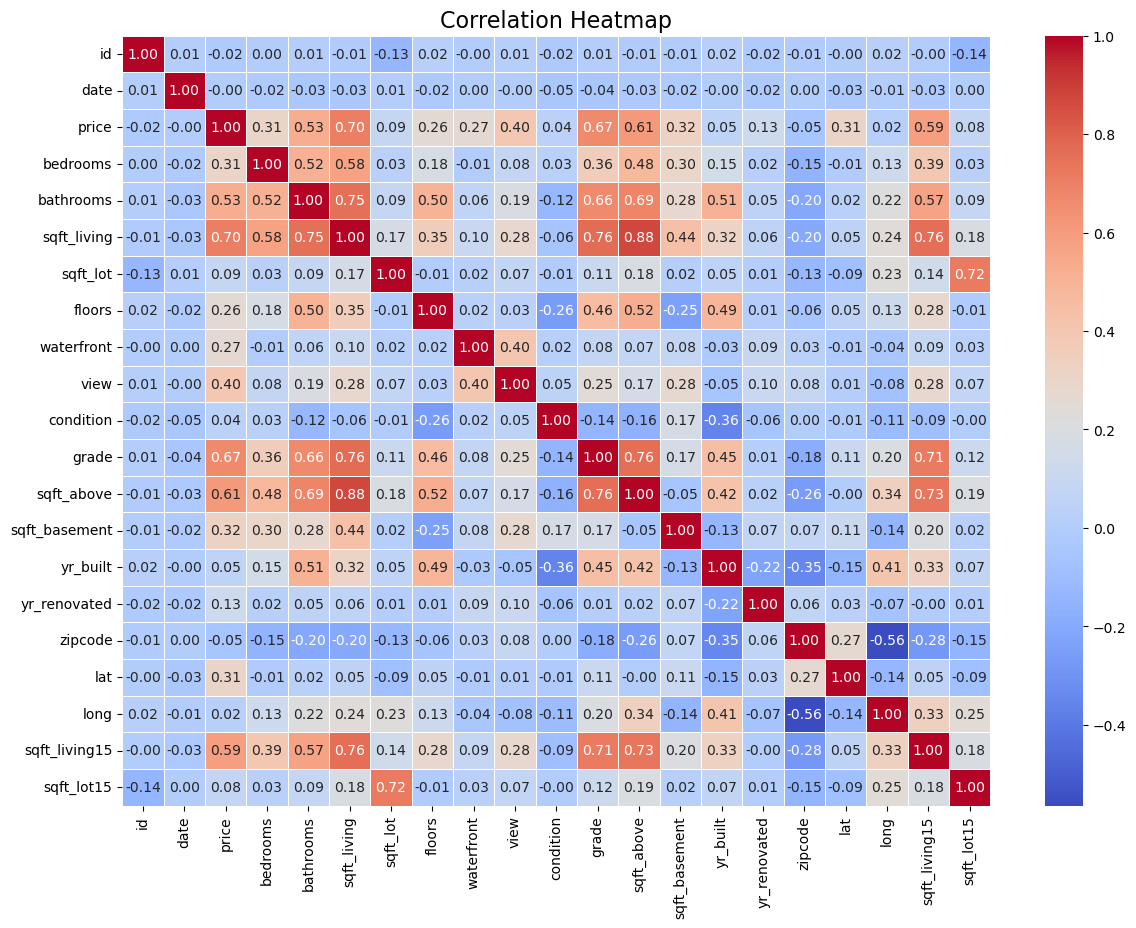

In [13]:
# Check for correlations
corr_matrix = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [14]:
# Drop less informative attributes or those highly correlated
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
data_selected = data[selected_features]

In [15]:
# Standardize numerical features
scaler = StandardScaler()
data_selected_scaled = pd.DataFrame(scaler.fit_transform(data_selected), columns=data_selected.columns)

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_selected_scaled, data['price'], test_size=0.2, random_state=42)

In [17]:
#Linear regression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, lr_predictions)
print("Linear Regression MSE:", mse_lr)

Linear Regression MSE: 45253105752.17033


In [18]:
# Multiple Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predictions
mlr_predictions = mlr_model.predict(X_test)

# Evaluate
mse_mlr = mean_squared_error(y_test, mlr_predictions)
print("Multiple Linear Regression MSE:", mse_mlr)


Multiple Linear Regression MSE: 45253105752.17033


In [19]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

degree = 2  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
poly_predictions = poly_model.predict(X_test_poly)

# Print the first few predictions
print("First few predictions:")
print(poly_predictions[:5])

# Evaluate
mse_poly = mean_squared_error(y_test, poly_predictions)
print("Polynomial Regression MSE:", mse_poly)


First few predictions:
[ 479691.  741278. 1278374. 2125338.  655542.]
Polynomial Regression MSE: 30631909318.793022


In [20]:
# The Polynomial Regression model has a lower MSE compared to the Linear Regression and Multiple Linear Regression models. 
# A lower MSE indicates better predictive performance, so the Polynomial Regression model is performing better 
# on the given test data.

In [21]:
#save the model
# Choose the best model based on MSE
best_model = poly_model  # Polynomial Regression model in this case

In [22]:
# Save the best model using pickle
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [23]:
# Load the best model using pickle
with open('best_model.pkl', 'rb') as model_file:
    poly_model = pickle.load(model_file)

In [24]:
# Apply the same PolynomialFeatures transformation to X_test as done during training
X_test_poly = poly_features.transform(X_test)

In [25]:
# Make predictions using the best model
loaded_poly_predictions = poly_model.predict(X_test_poly)

In [26]:
# Print the first few predictions
print("First few predictions using loaded model:")
print(loaded_poly_predictions[:5])

First few predictions using loaded model:
[ 479691.  741278. 1278374. 2125338.  655542.]


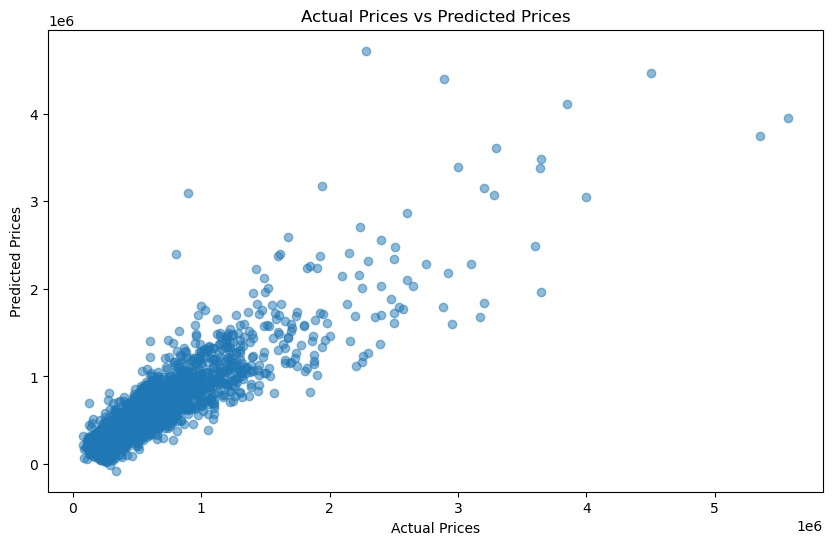

In [27]:
# Scatter plot for actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, loaded_poly_predictions, alpha=0.5)
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

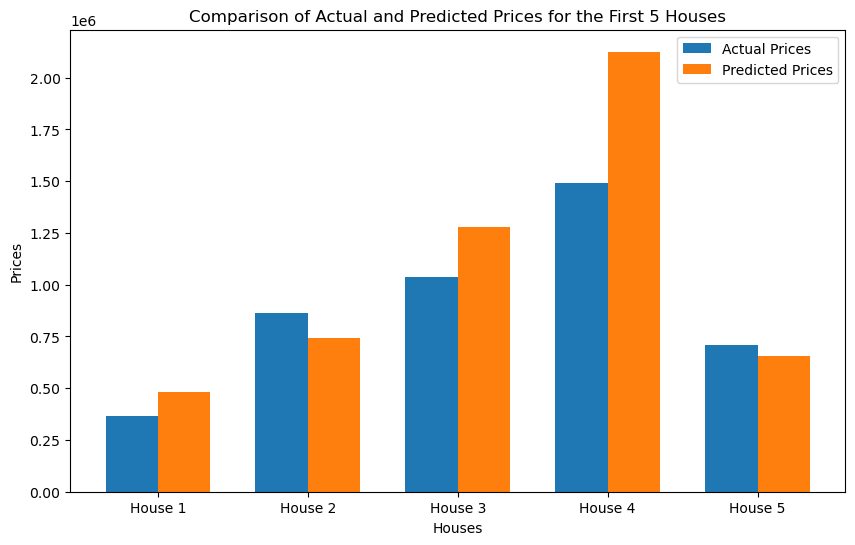

In [28]:
# Sample data for the first five houses
actual_prices = y_test[:5]
predicted_prices = loaded_poly_predictions[:5]

# Bar width for the histogram
bar_width = 0.35

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
indices = np.arange(len(actual_prices))

# Create bars for actual prices
actual_bar = ax.bar(indices, actual_prices, bar_width, label='Actual Prices')

# Create bars for predicted prices
predicted_bar = ax.bar(indices + bar_width, predicted_prices, bar_width, label='Predicted Prices')

# Set labels and title
ax.set_xlabel('Houses')
ax.set_ylabel('Prices')
ax.set_title('Comparison of Actual and Predicted Prices for the First 5 Houses')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(['House 1', 'House 2', 'House 3', 'House 4', 'House 5'])

# Add legend
ax.legend()

# Show the plot
plt.show()

In [30]:
#R-squared is a metric that provides an indication of how well the independent variables explain the variance
#in the dependent variable.
#It ranges from 0 to 1, where 1 indicates a perfect fit.
from sklearn.metrics import r2_score

r2 = r2_score(y_test, loaded_poly_predictions)
print("R-squared Score:", r2)

R-squared Score: 0.7973767992338138


In [31]:
#MAE measures the average absolute difference between the predicted and actual values. 
#It provides the average magnitude of the errors.
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, loaded_poly_predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 104770.31583969465


In [32]:
#MPE expresses the average percentage difference between predicted and actual values.
mpe = np.mean((y_test - loaded_poly_predictions) / y_test) * 100
print("Mean Percentage Error (MPE):", mpe)

Mean Percentage Error (MPE): -3.8107046001954306
